In [8]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2
import psutil

npool = psutil.cpu_count() - 1

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)

In [9]:
posterior_dict = pickle.load(open("events.pkl", "rb"))
    
print(f"Using {len(posterior_dict)} events.")

Using 69 events.


In [10]:
population_model = "PBH-CC-1st"
cosmology_model = 'flatLCDM'
outdir = f'results/H0_GWTC-3_{population_model}_{cosmology_model}_final/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [11]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

prior_dict


{'α': Uniform(minimum=0.0, maximum=5.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None),
 'Mf': Uniform(minimum=1.0, maximum=50.0, name='$M_f$', latex_label='$M_f$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

13:51 bilby INFO    : Running for label 'dynesty', output will be saved to 'results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final/'
13:51 bilby INFO    : Search parameters:
13:51 bilby INFO    :   α = Uniform(minimum=0.0, maximum=5.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None)
13:51 bilby INFO    :   Mf = Uniform(minimum=1.0, maximum=50.0, name='$M_f$', latex_label='$M_f$', unit=None, boundary=None)
13:51 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None)
13:51 bilby INFO    :   H0 = 67.4
13:51 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:189: RuntimeWarning: divide by zero encountered in log
13:51 bilby INFO    : Single likelihood evaluation took 2.468e-01 s


0it [00:00, ?it/s]

13:51 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 31, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fe657f581f0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
13:51 bilby INFO    : Checkpoint every check_point_delta_t = 60s
13:51 bilby INFO    : Using dynesty version 1.0.1
13:51 bilby INFO    : Using the bilby-implemented rwalk sampl

1041it [05:40,  4.97it/s, bound:0 nc: 28 ncall:4.5e+03 eff:23.0% logz=-1935.59+/-0.15 dlogz:179.747>0.1]  

13:57 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1366it [06:57,  2.50it/s, bound:0 nc: 40 ncall:8.5e+03 eff:16.0% logz=-1885.43+/-0.16 dlogz:129.049>0.1]

13:58 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1545it [08:16,  3.72it/s, bound:0 nc: 23 ncall:1.3e+04 eff:12.3% logz=-1859.43+/-0.15 dlogz:102.601>0.1]

13:59 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1681it [09:34,  1.71it/s, bound:0 nc: 42 ncall:1.7e+04 eff:10.1% logz=-1844.92+/-0.16 dlogz:87.807>0.1] 

14:01 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1776it [10:40,  1.64it/s, bound:10 nc: 36 ncall:2.0e+04 eff:8.9% logz=-1836.70+/-0.16 dlogz:79.391>0.1]

14:02 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1896it [11:48,  1.73it/s, bound:24 nc: 36 ncall:2.4e+04 eff:7.8% logz=-1826.73+/-0.16 dlogz:70.126>0.1]

14:03 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2012it [12:55,  1.68it/s, bound:37 nc: 36 ncall:2.8e+04 eff:7.1% logz=-1816.86+/-0.16 dlogz:60.016>0.1]

14:04 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2128it [14:02,  1.70it/s, bound:50 nc: 36 ncall:3.3e+04 eff:6.5% logz=-1808.86+/-0.16 dlogz:52.221>0.1]

14:05 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2242it [15:10,  1.67it/s, bound:63 nc: 32 ncall:3.7e+04 eff:6.1% logz=-1802.96+/-0.16 dlogz:47.464>0.1]

14:06 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2357it [16:24,  1.54it/s, bound:76 nc: 36 ncall:4.1e+04 eff:5.7% logz=-1797.49+/-0.16 dlogz:41.758>0.1]

14:08 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2478it [17:37,  1.65it/s, bound:90 nc: 35 ncall:4.6e+04 eff:5.4% logz=-1792.67+/-0.16 dlogz:36.682>0.1]

14:09 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2598it [18:48,  1.65it/s, bound:103 nc: 37 ncall:5.0e+04 eff:5.2% logz=-1787.29+/-0.17 dlogz:31.086>0.1]

14:10 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2712it [20:01,  1.56it/s, bound:116 nc: 60 ncall:5.4e+04 eff:5.0% logz=-1782.94+/-0.17 dlogz:26.489>0.1]

14:11 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2826it [21:17,  1.51it/s, bound:129 nc: 34 ncall:5.8e+04 eff:4.9% logz=-1779.70+/-0.17 dlogz:23.015>0.1]

14:12 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2909it [22:19,  1.33it/s, bound:140 nc: 39 ncall:6.1e+04 eff:4.7% logz=-1777.55+/-0.17 dlogz:20.701>0.1]

14:13 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2997it [23:25,  1.35it/s, bound:150 nc: 36 ncall:6.5e+04 eff:4.6% logz=-1775.62+/-0.17 dlogz:18.582>0.1]

14:15 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3084it [24:28,  1.33it/s, bound:161 nc: 32 ncall:6.8e+04 eff:4.5% logz=-1773.81+/-0.17 dlogz:16.599>0.1]

14:16 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3169it [25:31,  1.29it/s, bound:171 nc: 36 ncall:7.1e+04 eff:4.4% logz=-1772.25+/-0.17 dlogz:14.872>0.1]

14:17 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3256it [26:35,  1.34it/s, bound:181 nc: 40 ncall:7.5e+04 eff:4.4% logz=-1770.86+/-0.17 dlogz:13.303>0.1]

14:18 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3348it [27:42,  1.36it/s, bound:192 nc: 38 ncall:7.8e+04 eff:4.3% logz=-1769.62+/-0.17 dlogz:11.873>0.1]

14:19 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3437it [28:51,  1.27it/s, bound:203 nc: 35 ncall:8.2e+04 eff:4.2% logz=-1768.54+/-0.17 dlogz:10.616>0.1]

14:20 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3527it [29:58,  1.32it/s, bound:215 nc: 36 ncall:8.5e+04 eff:4.1% logz=-1767.59+/-0.17 dlogz:9.481>0.1] 

14:21 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3619it [31:07,  1.35it/s, bound:226 nc: 40 ncall:8.9e+04 eff:4.1% logz=-1766.71+/-0.18 dlogz:8.421>0.1]

14:22 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3707it [32:14,  1.29it/s, bound:237 nc: 40 ncall:9.2e+04 eff:4.0% logz=-1765.95+/-0.18 dlogz:7.481>0.1]

14:23 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3798it [33:23,  1.32it/s, bound:249 nc: 38 ncall:9.6e+04 eff:4.0% logz=-1765.30+/-0.18 dlogz:6.649>0.1]

14:25 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3889it [34:32,  1.30it/s, bound:260 nc: 36 ncall:9.9e+04 eff:3.9% logz=-1764.76+/-0.18 dlogz:5.934>0.1]

14:26 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3978it [35:41,  1.28it/s, bound:272 nc: 33 ncall:1.0e+05 eff:3.9% logz=-1764.29+/-0.18 dlogz:5.289>0.1]

14:27 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4062it [36:48,  1.23it/s, bound:283 nc: 79 ncall:1.1e+05 eff:3.8% logz=-1763.90+/-0.18 dlogz:4.734>0.1]

14:28 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4153it [37:57,  1.27it/s, bound:295 nc: 40 ncall:1.1e+05 eff:3.8% logz=-1763.52+/-0.18 dlogz:4.179>0.1]

14:29 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:29 bilby INFO    : Writing 108 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4242it [39:06,  1.28it/s, bound:306 nc: 40 ncall:1.1e+05 eff:3.7% logz=-1763.19+/-0.18 dlogz:3.677>0.1]

14:30 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:30 bilby INFO    : Writing 122 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4331it [40:14,  1.28it/s, bound:318 nc: 39 ncall:1.2e+05 eff:3.7% logz=-1762.88+/-0.18 dlogz:3.212>0.1]

14:31 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:31 bilby INFO    : Writing 154 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4420it [41:22,  1.29it/s, bound:330 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1762.63+/-0.18 dlogz:2.798>0.1]

14:33 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:33 bilby INFO    : Writing 188 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4510it [42:30,  1.29it/s, bound:341 nc: 39 ncall:1.3e+05 eff:3.6% logz=-1762.40+/-0.18 dlogz:2.426>0.1]

14:34 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:34 bilby INFO    : Writing 197 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4599it [43:37,  1.31it/s, bound:353 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1762.21+/-0.18 dlogz:2.097>0.1]

14:35 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:35 bilby INFO    : Writing 253 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4691it [44:45,  1.33it/s, bound:364 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1762.05+/-0.18 dlogz:1.794>0.1]

14:36 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:36 bilby INFO    : Writing 309 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4780it [45:53,  1.26it/s, bound:376 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1761.90+/-0.18 dlogz:1.533>0.1]

14:37 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:37 bilby INFO    : Writing 329 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4864it [47:01,  1.25it/s, bound:387 nc: 38 ncall:1.4e+05 eff:3.5% logz=-1761.78+/-0.18 dlogz:1.314>0.1]

14:38 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:38 bilby INFO    : Writing 454 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4954it [48:07,  1.30it/s, bound:399 nc: 40 ncall:1.4e+05 eff:3.4% logz=-1761.66+/-0.18 dlogz:1.107>0.1]

14:39 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:39 bilby INFO    : Writing 485 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5043it [49:14,  1.34it/s, bound:411 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1761.57+/-0.18 dlogz:0.931>0.1]

14:40 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:40 bilby INFO    : Writing 638 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5134it [50:21,  1.33it/s, bound:422 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1761.48+/-0.18 dlogz:0.776>0.1]

14:42 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:42 bilby INFO    : Writing 727 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5224it [51:27,  1.35it/s, bound:434 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1761.40+/-0.18 dlogz:0.646>0.1]

14:43 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:43 bilby INFO    : Writing 922 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5312it [52:34,  1.30it/s, bound:445 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1761.34+/-0.18 dlogz:0.539>0.1]

14:44 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:44 bilby INFO    : Writing 1029 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5401it [53:41,  1.35it/s, bound:457 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1761.28+/-0.18 dlogz:0.450>0.1]

14:45 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:45 bilby INFO    : Writing 1221 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5491it [54:48,  1.33it/s, bound:469 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1761.23+/-0.18 dlogz:0.373>0.1]

14:46 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:46 bilby INFO    : Writing 1544 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5580it [55:55,  1.28it/s, bound:480 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1761.19+/-0.18 dlogz:0.311>0.1]

14:47 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:47 bilby INFO    : Writing 1657 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5668it [57:01,  1.34it/s, bound:492 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1761.16+/-0.18 dlogz:0.259>0.1]

14:48 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:48 bilby INFO    : Writing 1685 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5759it [58:09,  1.32it/s, bound:503 nc: 40 ncall:1.8e+05 eff:3.3% logz=-1761.13+/-0.18 dlogz:0.214>0.1]

14:49 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:49 bilby INFO    : Writing 1657 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5848it [59:15,  1.34it/s, bound:515 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1761.10+/-0.18 dlogz:0.178>0.1]

14:50 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:50 bilby INFO    : Writing 1642 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5938it [1:00:22,  1.32it/s, bound:526 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1761.08+/-0.18 dlogz:0.148>0.1]

14:52 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:52 bilby INFO    : Writing 1684 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6028it [1:01:28,  1.36it/s, bound:538 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1761.06+/-0.18 dlogz:0.122>0.1]

14:53 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:53 bilby INFO    : Writing 1661 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6119it [1:02:34,  1.35it/s, bound:550 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1761.04+/-0.18 dlogz:0.103>0.1]

14:54 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:54 bilby INFO    : Writing 1704 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6131it [1:02:36,  1.55it/s, bound:551 nc:  1 ncall:1.9e+05 eff:3.2% logz=-1761.04+/-0.18 dlogz:0.100>0.1]

14:54 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_resume.pickle
14:54 bilby INFO    : Writing 1645 current samples to results/H0_GWTC-3_PBH-CC-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
14:54 bilby INFO    : Starting to close worker pool.
14:54 bilby INFO    : Finished closing worker pool.


6131it [1:02:39,  1.63it/s, bound:551 nc:  1 ncall:1.9e+05 eff:3.4% logz=-1760.96+/-0.19 dlogz:0.000>0.1]

14:54 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
14:54 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
14:54 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
14:54 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.


14:54 bilby INFO    : Sampling time: 0:58:14.155578
14:54 bilby INFO    : Summary of results:
nsamples: 6631
ln_noise_evidence:    nan
ln_evidence: -1760.956 +/-  0.186
ln_bayes_factor:    nan +/-  0.186



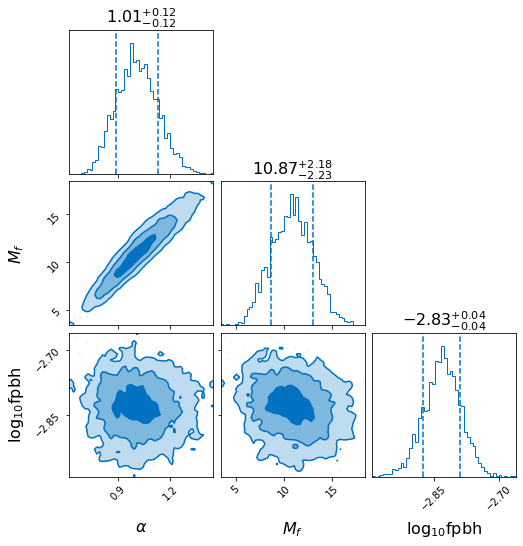

In [12]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=npool, parallel=2000, check_point_delta_t=60)
result.plot_corner()
